**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load The dataset**

In [ ]:
housing=fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
x = housing.data
y = housing.target
df = pd.DataFrame(x, columns=housing.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Missing value check**

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


Since there are no missing values in dataset.

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [ ]:
housing.target_names

['MedHouseVal']

**checking for columns = categorical or numerical**

In [ ]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


**Since there are only numerical features so we don't have to change types of features .If there are categorical features then we can change categorical features to  numerical features by OneHot Encoding.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Normalization or scale Numerical features by StandardScaler known as preprocessing**

In [ ]:
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now, 'df' contains the normalized/scaled numerical features.
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


**Some important Exploratory data analysis(EDA) -
Correlation Matrix -shows how variables are correlated to each other by showing correlation coefficients.
PairPlot - visualize relationships between features.
Histogram - to visualize distribution of target variables.
BoxPlot - to identify outliers
Scatterplot - to visualize relationships between target and features.**

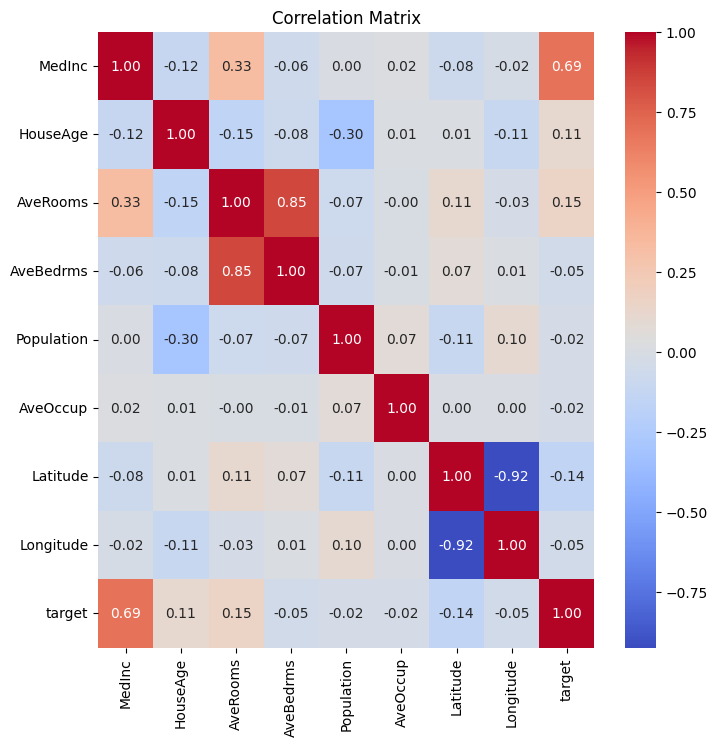

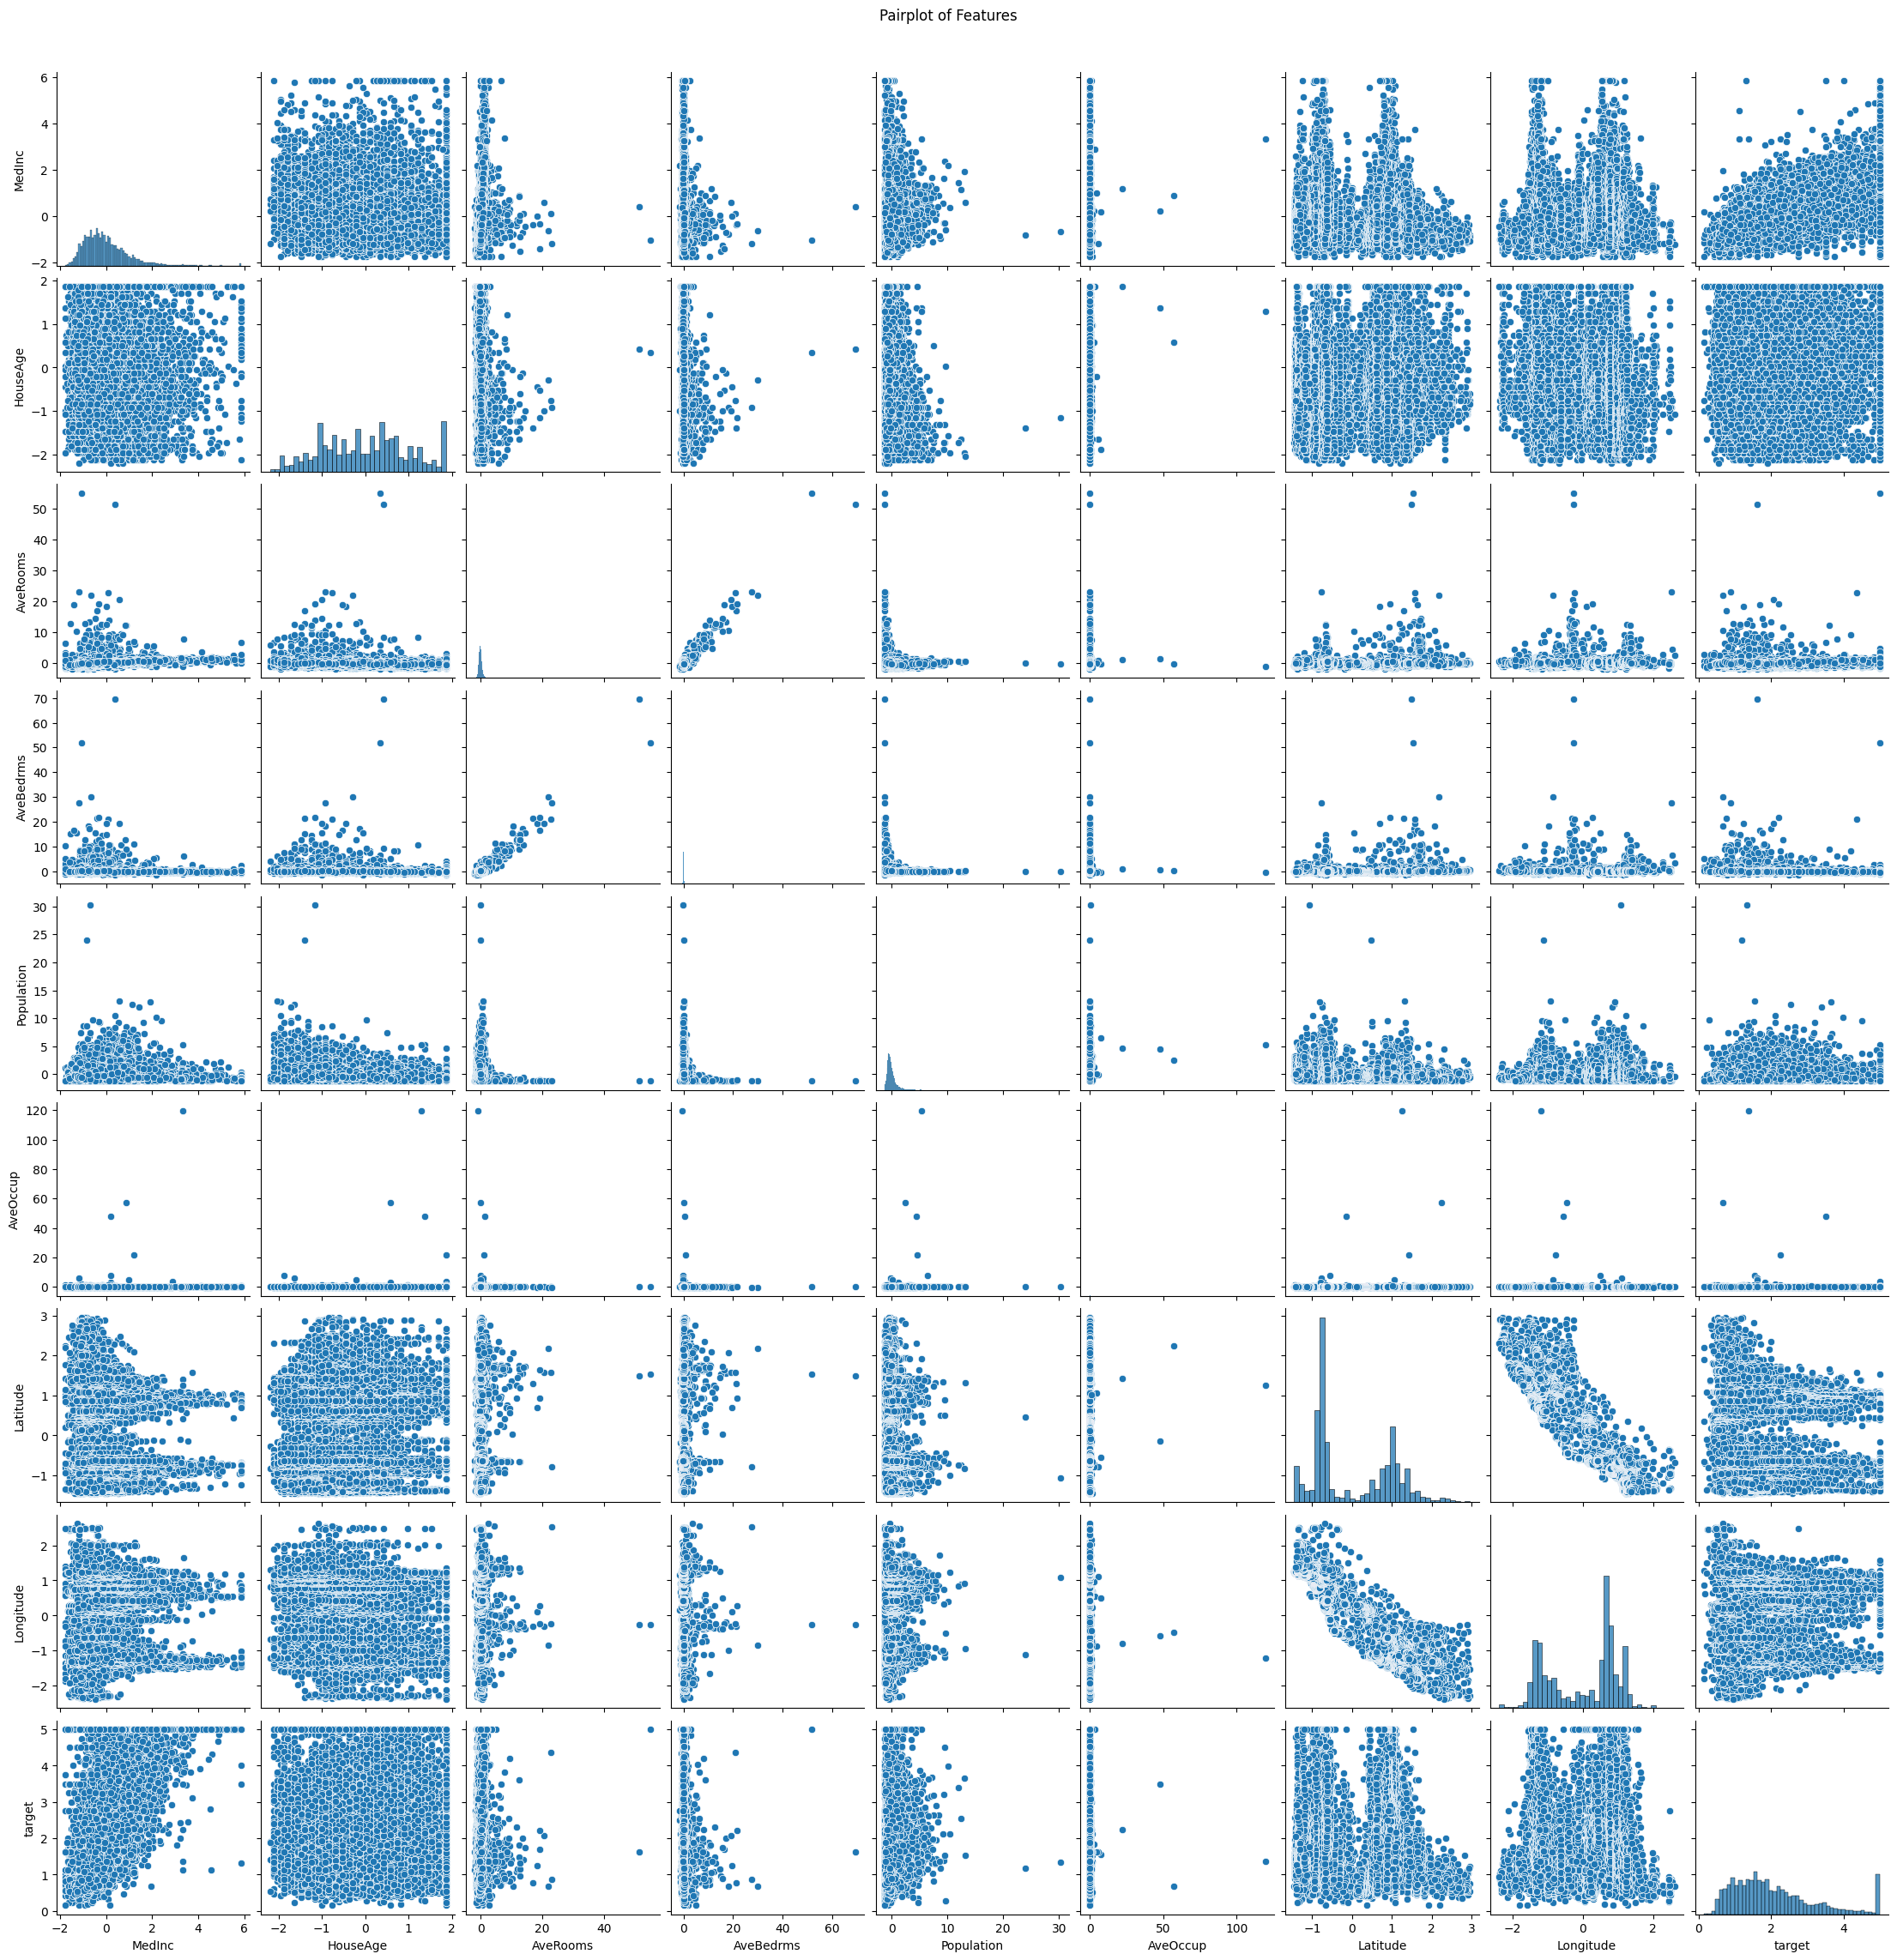

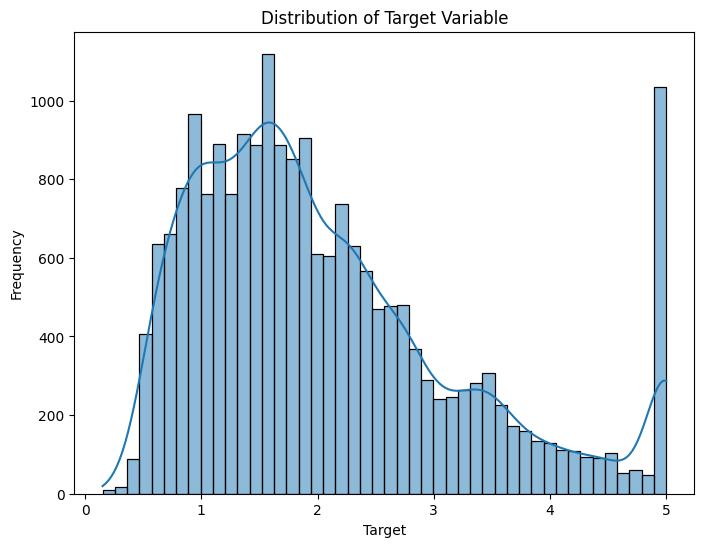

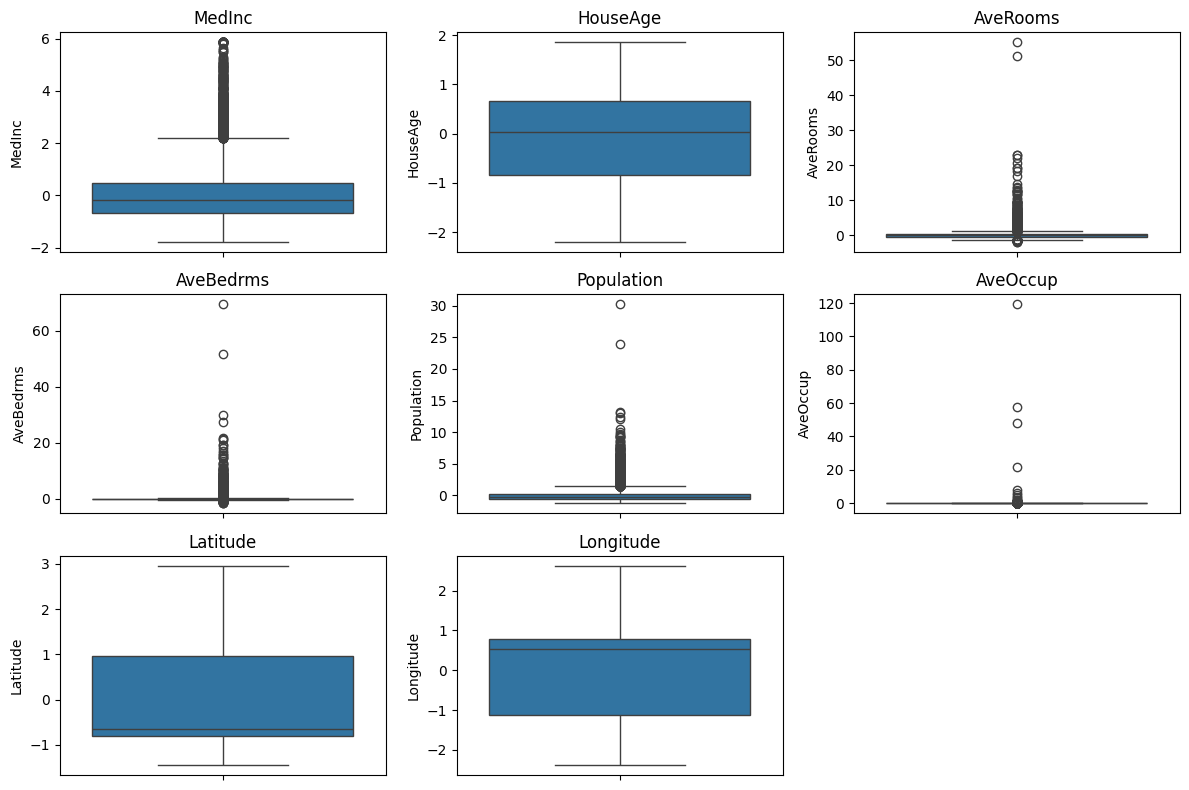

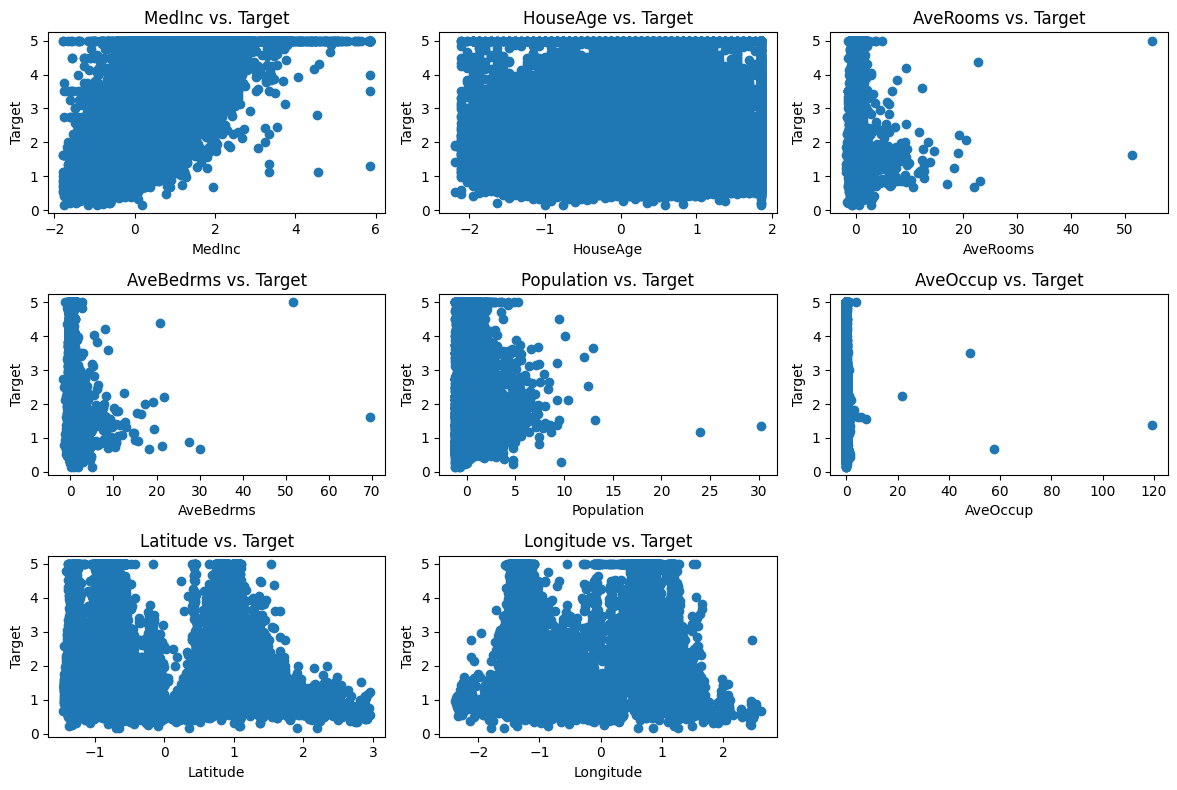

In [ ]:
# Summary statistics
df.describe()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()

# Scatter plots to visualize relationship between target and features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
  plt.subplot(3, 3, i + 1)
  plt.scatter(df[feature], df['target'])
  plt.title(f'{feature} vs. Target')
  plt.xlabel(feature)
  plt.ylabel('Target')
plt.tight_layout()
plt.show()


# **Train a Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# print the coefficients and intercept of the model
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 0.5558915986952441
R-squared: 0.575787706032451
Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
Intercept: 2.067862309508389


**After training and testing of model we evaluate the model by checking Mean Squared Error and R-Squared . Here I got MSE as 0.56 and R-squared as 0.57 which is  poor so i use DecisionTreeRegressor model and Neural network.**

# **Train a Decion Tree model for regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree Mean Squared Error: 0.4942716777366763
Decision Tree R-squared: 0.6228111330554302


**After training and testing of model i evaulate the model by checking MSE and R-squared.In this model i got MSE as 0.49 and R-squared as 0.62 which is pretty good but we can enhance the performance of model by doing hyperparameter tuning so we can find best hyperparanmeter.**

# **Hyperparameter tuning by GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeRegressor object
tree_model = DecisionTreeRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_tree_model = grid_search.best_estimator_
y_pred_tree_best = best_tree_model.predict(X_test)

# Evaluate the best model
mse_tree_best = mean_squared_error(y_test, y_pred_tree_best)
r2_tree_best = r2_score(y_test, y_pred_tree_best)

print(f'Best Decision Tree Mean Squared Error: {mse_tree_best}')
print(f'Best Decision Tree R-squared: {r2_tree_best}')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: -0.38677718831054475
Best Decision Tree Mean Squared Error: 0.4082393697397218
Best Decision Tree R-squared: 0.6884641539256358


**By hyperparameter tuning we found best hyperparameter for our model now we train our model by using that hyperparameter.**

# **Train a hyperparameter tuned model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_split=2,min_samples_leaf=4)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Mean Squared Error: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')


Decision Tree Mean Squared Error: 0.4082393697397218
Decision Tree R-squared: 0.6884641539256358


**After training and testing of our tuned model and evaluating the model we got MSE as 0.39 and R-squared as 0.70 which is good but we can check for other model such as RandomForest and NeuralNetwork.Here I use NeuralNetwork.**

# **Train a simple NeuralNetwork model by using Pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Define a custom dataset
class HousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and data loaders
train_dataset = HousingDataset(X_train_tensor, y_train_tensor)
test_dataset = HousingDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the model, loss function, and optimizer
input_size = X_train.shape[1]
model = RegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_list = []
    for batch_X, _ in test_loader:
        outputs = model(batch_X)
        y_pred_list.append(outputs.numpy())

    y_pred_nn = np.concatenate(y_pred_list)
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    r2_nn = r2_score(y_test, y_pred_nn)

    print(f'Neural Network Mean Squared Error: {mse_nn}')
    print(f'Neural Network R-squared: {r2_nn}')


Epoch [10/100], Loss: 0.2022
Epoch [20/100], Loss: 0.2211
Epoch [30/100], Loss: 0.2158
Epoch [40/100], Loss: 0.1711
Epoch [50/100], Loss: 0.1574
Epoch [60/100], Loss: 0.3708
Epoch [70/100], Loss: 0.2100
Epoch [80/100], Loss: 0.1675
Epoch [90/100], Loss: 0.2310
Epoch [100/100], Loss: 0.2670
Neural Network Mean Squared Error: 0.28006297315667794
Neural Network R-squared: 0.7862781942072496


**By training and testing of NeuralNetwork and evaluate the model we got MSE as 0.27 and R-squared as 0.80 which is very good from other two models but we can check either we can enhance performance of our model or not by Hyperparameter tuning.**

# **Train a NeuralNetwork model by inceasing hidden layes numbers and by using dropout and Batch normalization so we can check our model performance enhanced or not.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Load The dataset
housing = fetch_california_housing()
x = housing.data
y = housing.target
df = pd.DataFrame(x, columns=housing.feature_names)
df['target'] = y

# Normalization or scale Numerical features by StandardScaler known as preprocessing
scaler = StandardScaler()
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the data into training, validation, and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


# Define a custom dataset
class HousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and data loaders
train_dataset = HousingDataset(X_train_tensor, y_train_tensor)
val_dataset = HousingDataset(X_val_tensor, y_val_tensor)
test_dataset = HousingDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Define the neural network model with dropout and batch normalization
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create the model, loss function, and optimizer
input_size = X_train.shape[1]
model = RegressionModel(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training loop with validation
num_epochs = 100
best_val_loss = float('inf')
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    model.eval()  # Set the model to evaluation mode
    val_loss_list = []
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            val_loss = criterion(outputs, batch_y)
            val_loss_list.append(val_loss.item())
    avg_val_loss = np.mean(val_loss_list)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {avg_val_loss:.4f}')

    # Save the model if validation loss improves
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')


# Load the best model
model.load_state_dict(torch.load('best_model.pth'))


# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred_list = []
    for batch_X, _ in test_loader:
        outputs = model(batch_X)
        y_pred_list.append(outputs.numpy())

    y_pred_nn = np.concatenate(y_pred_list)
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    r2_nn = r2_score(y_test, y_pred_nn)

    print(f'Neural Network Mean Squared Error: {mse_nn}')
    print(f'Neural Network R-squared: {r2_nn}')



Epoch [10/100], Train Loss: 0.2712, Val Loss: 0.5706
Epoch [20/100], Train Loss: 0.2938, Val Loss: 0.5141
Epoch [30/100], Train Loss: 0.1607, Val Loss: 0.4892
Epoch [40/100], Train Loss: 0.4829, Val Loss: 0.5569
Epoch [50/100], Train Loss: 0.5469, Val Loss: 0.6070
Epoch [60/100], Train Loss: 0.4098, Val Loss: 0.4781
Epoch [70/100], Train Loss: 0.4874, Val Loss: 0.6618
Epoch [80/100], Train Loss: 0.2426, Val Loss: 0.5251
Epoch [90/100], Train Loss: 0.3191, Val Loss: 0.5497
Epoch [100/100], Train Loss: 0.2917, Val Loss: 0.5736
Neural Network Mean Squared Error: 0.3484455469302923
Neural Network R-squared: 0.7340940479528402


**After training and testing of our new NeuralNetwork model with dropout and batch normalization our model performance is not enhanced so we can use our first neural network model without dropout to predicting house prices.**

# **Comaprison of our three models which are Linear Regression,Decision Tree and Neural Network**

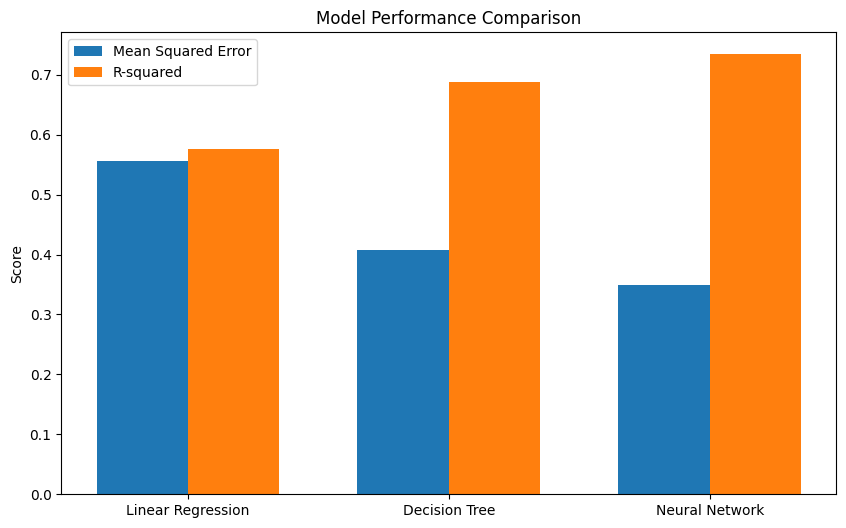

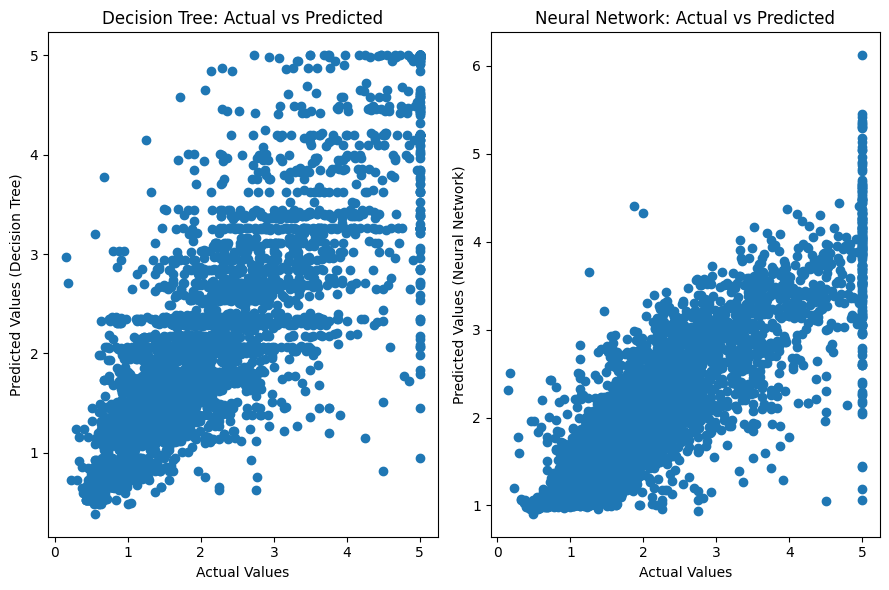

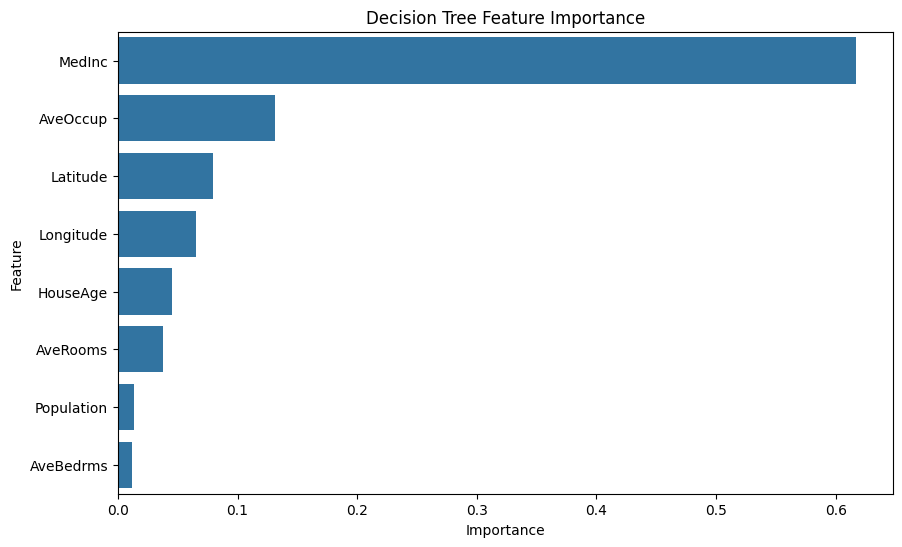

In [ ]:
# Visualize the performance comparison

plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Decision Tree', 'Neural Network']
mse_scores = [mse, mse_tree, mse_nn]
r2_scores = [r2, r2_tree, r2_nn]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, mse_scores, width, label='Mean Squared Error')
plt.bar(x + width/2, r2_scores, width, label='R-squared')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


# Visualize the actual vs predicted values for Decision Tree and Neural Network
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Decision Tree: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Neural Network)')
plt.title('Neural Network: Actual vs Predicted')

plt.tight_layout()
plt.show()


# You can also visualize the feature importance for the Decision Tree model
if hasattr(tree_model, 'feature_importances_'):
  feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': tree_model.feature_importances_})
  feature_importance = feature_importance.sort_values('Importance', ascending=False)

  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importance)
  plt.title('Decision Tree Feature Importance')
  plt.show()



For comparison of our models we use bar plot so we can clearly visualize which model is best for predicting house price.we will also visualize the actual values and predicted values of decision tree and neural network by scatter plot and also we can see decision tree feature importance by barplot

# **Summary**

Imports: It includes libraries like NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn.
Dataset: It loads the California housing dataset using fetch_california_housing().
Data Processing: The data is extracted into a Pandas DataFrame, with features and target values.
Models Used:
Linear Regression

Initially trained but gave poor performance with Mean Squared Error (MSE) of 0.56 and R-squared of 0.57.
Due to low accuracy, Decision Tree Regressor and Neural Network models were tested.
Decision Tree Regressor

After training, it achieved MSE of 0.49 and R-squared of 0.62.
Performance was better than Linear Regression, but further improvement was possible through hyperparameter tuning.
Neural Network

Performed the best among all models, achieving MSE of 0.27 and R-squared of 0.80.
Further improvements could be explored using hyperparameter tuning.
Model Comparison:
Linear Regression had the weakest performance.
Decision Tree Regressor showed improvement but was not the best.
Neural Network gave the highest accuracy, indicating it was the most suitable model for this dataset.
Hyperparameter Tuning:
GridSearchCV was used to find the best hyperparameters for the models.
The best hyperparameters were applied to retrain the model, improving its performance.
Visualizations:
Exploratory Data Analysis (EDA):

Correlation Matrix: Shows relationships between features.
PairPlot: Visualizes feature relationships.
Histogram: Displays the distribution of the target variable.
BoxPlot: Helps identify outliers.
Model Performance Comparison:

A bar plot was used to compare model performances.
Scatter plots were used to visualize actual vs. predicted values for Decision Tree and Neural Network models.
A bar plot was used to show Decision Tree feature importance.